In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!git clone https://github.com/thangnch/MiAI_Imbalanced_Dataset.git

Cloning into 'MiAI_Imbalanced_Dataset'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 16 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (16/16), 1.40 MiB | 4.81 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [3]:
df = pd.read_csv('/content/MiAI_Imbalanced_Dataset/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


<Axes: xlabel='Exited'>

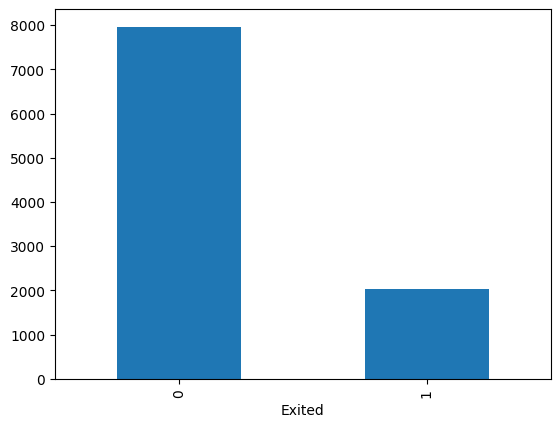

In [5]:
df['Exited'].value_counts().plot(kind= "bar")

In [6]:
dataset = df.drop(['RowNumber', 'Surname', 'CustomerId'], axis=1)
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
dataset = pd.get_dummies(dataset, drop_first=True)
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [34]:
  from sklearn.model_selection import train_test_split
  from sklearn.preprocessing import StandardScaler, MinMaxScaler

  X = dataset.drop(['Exited'], axis=1)
  y = dataset['Exited']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  scaler = MinMaxScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

# train with imbalance data
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8125
[[1550   57]
 [ 318   75]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.57      0.19      0.29       393

    accuracy                           0.81      2000
   macro avg       0.70      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

0.866
[[1542   65]
 [ 203  190]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.48      0.59       393

    accuracy                           0.87      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [25]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(random_state= 42, n_estimators=100)
model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8695
[[1521   86]
 [ 175  218]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1607
           1       0.72      0.55      0.63       393

    accuracy                           0.87      2000
   macro avg       0.81      0.75      0.77      2000
weighted avg       0.86      0.87      0.86      2000



In [26]:
dataset['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [28]:
dataset_0 = dataset[dataset['Exited'] == 0]
dataset_1 = dataset[dataset['Exited'] == 1]
dataset_0.shape, dataset_1.shape


((7963, 12), (2037, 12))

In [29]:
# random under sampling
dataset_0_rus = dataset_0.sample(dataset_1.shape[0])
dataset_0_rus.shape
#

(2037, 12)

In [30]:
dataset_rus = pd.concat([dataset_0_rus, dataset_1])
dataset_rus.shape

(4074, 12)

In [33]:
X_rus = dataset_rus.drop(['Exited'], axis=1)
y_rus = dataset_rus['Exited']

X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# train with undersampling data
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.7067484662576687
[[310 133]
 [106 266]]
              precision    recall  f1-score   support

           0       0.75      0.70      0.72       443
           1       0.67      0.72      0.69       372

    accuracy                           0.71       815
   macro avg       0.71      0.71      0.71       815
weighted avg       0.71      0.71      0.71       815

0.7374233128834355
[[341 102]
 [112 260]]
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       443
           1       0.72      0.70      0.71       372

    accuracy                           0.74       815
   macro avg       0.74      0.73      0.73       815
weighted avg       0.74      0.74      0.74       815



In [40]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)

X_ros.shape, y_ros.shape, X_rus.shape, y_rus.shape

((15926, 11), (15926,), (4074, 11), (4074,))

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# train with undersampling data
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7202453987730061
[[322 121]
 [107 265]]
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       443
           1       0.69      0.71      0.70       372

    accuracy                           0.72       815
   macro avg       0.72      0.72      0.72       815
weighted avg       0.72      0.72      0.72       815

0.7644171779141105
[[355  88]
 [104 268]]
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       443
           1       0.75      0.72      0.74       372

    accuracy                           0.76       815
   macro avg       0.76      0.76      0.76       815
weighted avg       0.76      0.76      0.76       815



In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# train with oversampling data
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7011927181418707
[[1152  481]
 [ 471 1082]]
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      1633
           1       0.69      0.70      0.69      1553

    accuracy                           0.70      3186
   macro avg       0.70      0.70      0.70      3186
weighted avg       0.70      0.70      0.70      3186

0.9488386691776522
[[1501  132]
 [  31 1522]]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1633
           1       0.92      0.98      0.95      1553

    accuracy                           0.95      3186
   macro avg       0.95      0.95      0.95      3186
weighted avg       0.95      0.95      0.95      3186



In [41]:
# SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)
X_smote.shape, y_smote.shape

((15926, 11), (15926,))

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# train with oversampling data
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7736974262397991
[[1263  370]
 [ 351 1202]]
              precision    recall  f1-score   support

           0       0.78      0.77      0.78      1633
           1       0.76      0.77      0.77      1553

    accuracy                           0.77      3186
   macro avg       0.77      0.77      0.77      3186
weighted avg       0.77      0.77      0.77      3186

0.8703703703703703
[[1429  204]
 [ 209 1344]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1633
           1       0.87      0.87      0.87      1553

    accuracy                           0.87      3186
   macro avg       0.87      0.87      0.87      3186
weighted avg       0.87      0.87      0.87      3186

